In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score

In [2]:
df=pd.read_csv('C:\DEPI\Depi Graduation project\metadata.xls')
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True


# Data Cleaning & Data Preprossing 

In [3]:
df.shape

(2298, 26)

In [4]:
df.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lesion_id,2298.0,1529.933856,1196.285644,6.0,720.5,1297.0,1782.75,4820.0
age,2298.0,60.464752,15.894866,6.0,52.0,62.0,72.00,94.0
fitspatrick,1494.0,2.265730,0.729029,1.0,2.0,2.0,3.00,6.0
diameter_1,1494.0,11.897055,8.634492,0.0,7.0,10.0,15.00,100.0
diameter_2,1494.0,8.852209,5.797036,0.0,5.0,8.0,10.00,70.0


In [7]:
df.isnull().sum()

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64

In [8]:

df.dropna(inplace=True)


In [9]:
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,...,10.0,BCC,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_778_1471_835.png,True
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,...,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_117_179_983.png,True
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,...,7.0,ACK,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,PAT_705_4015_413.png,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,True,False,POMERANIA,POMERANIA,66,False,MALE,True,...,15.0,ACK,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,PAT_386_785_536.png,True
2291,PAT_273,421,False,False,POMERANIA,POMERANIA,41,True,MALE,False,...,5.0,BCC,TRUE,UNK,TRUE,UNK,TRUE,TRUE,PAT_273_421_905.png,True
2292,PAT_491,934,False,False,POMERANIA,POMERANIA,43,True,FEMALE,True,...,5.0,SCC,TRUE,UNK,FALSE,UNK,TRUE,TRUE,PAT_491_934_46.png,True
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,PAT_46_880_140.png,True


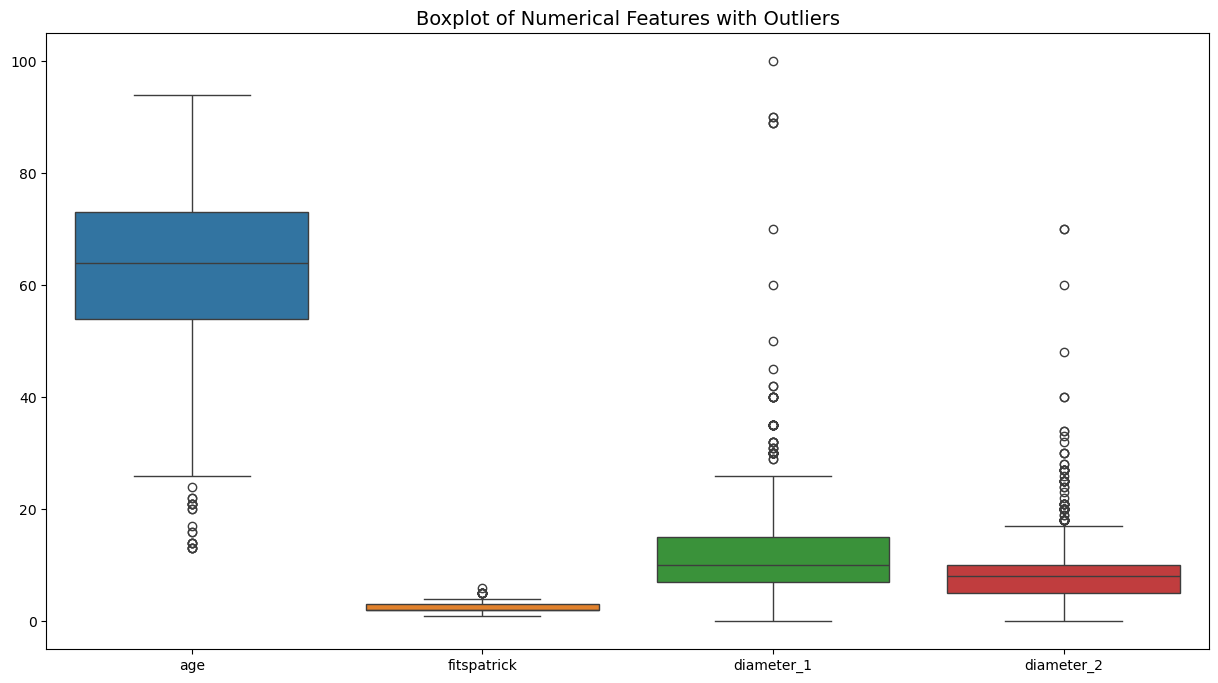

In [10]:
plt.figure(figsize=(15, 8))


sns.boxplot(data=df[['age', 'fitspatrick', 'diameter_1', 'diameter_2', 'changed']])

plt.title("Boxplot of Numerical Features with Outliers", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [11]:
for col in ['age', 'diameter_1', 'diameter_2']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [12]:
for col in ['age', 'diameter_1', 'diameter_2']:
    df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))

In [13]:
df.sample(10)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
739,PAT_356,735,False,True,GERMANY,UNK,58.0,True,MALE,True,...,10.0,BCC,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,PAT_356_735_568.png,True
2172,PAT_267,1061,False,False,POMERANIA,POMERANIA,79.0,False,MALE,False,...,8.0,BCC,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_267_1061_324.png,True
1350,PAT_782,1494,False,False,GERMANY,GERMANY,71.0,False,MALE,True,...,10.0,BCC,TRUE,UNK,FALSE,UNK,FALSE,FALSE,PAT_782_1494_418.png,True
1102,PAT_756,1496,False,True,ITALY,ITALY,39.0,False,FEMALE,False,...,5.0,NEV,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,PAT_756_1496_480.png,True
1656,PAT_363,745,False,True,POMERANIA,POMERANIA,63.0,True,MALE,False,...,5.0,BCC,FALSE,UNK,FALSE,UNK,FALSE,TRUE,PAT_363_745_516.png,True
1607,PAT_388,1592,False,False,ITALY,ITALY,51.0,False,FEMALE,True,...,11.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,PAT_388_1592_850.png,True
969,PAT_409,2614,False,False,ITALY,ITALY,46.0,True,FEMALE,False,...,3.0,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_409_2614_805.png,False
285,PAT_59,94,True,False,BRAZIL,BRAZIL,72.0,False,FEMALE,False,...,15.0,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,PAT_59_94_849.png,True
178,PAT_395,795,False,False,GERMANY,GERMANY,58.0,True,FEMALE,False,...,12.0,SCC,TRUE,UNK,FALSE,UNK,TRUE,TRUE,PAT_395_795_43.png,True
56,PAT_183,283,False,False,UNK,UNK,76.0,False,MALE,True,...,7.0,SCC,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_183_283_495.png,True


## EDA VISUALIZATION

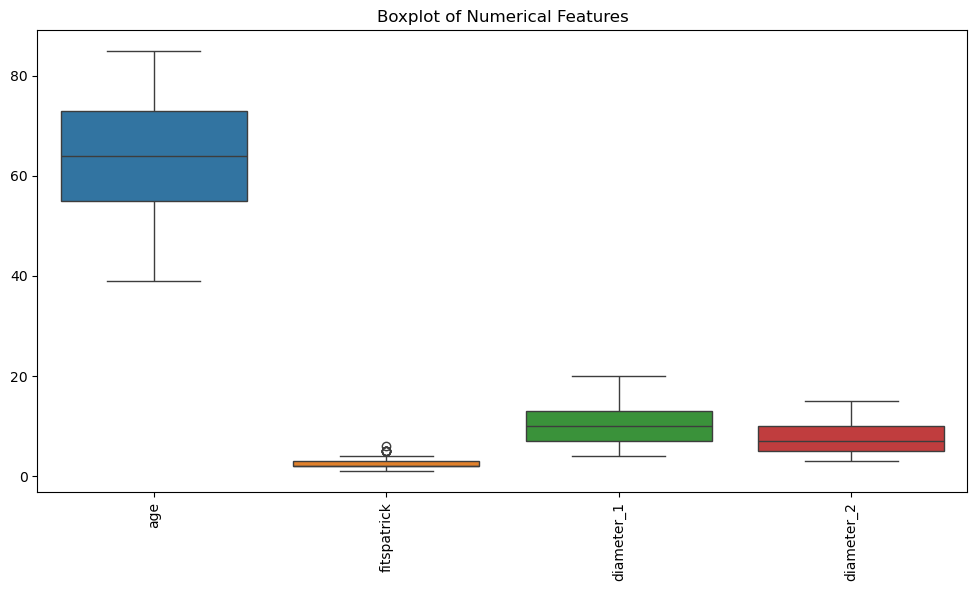

In [14]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('lesion_id')  
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()
# كود لوغارتمي استخدمته عشان لو فيه فروق كبيره ما بين القيم وعشان يوضح الرسمه اكتر

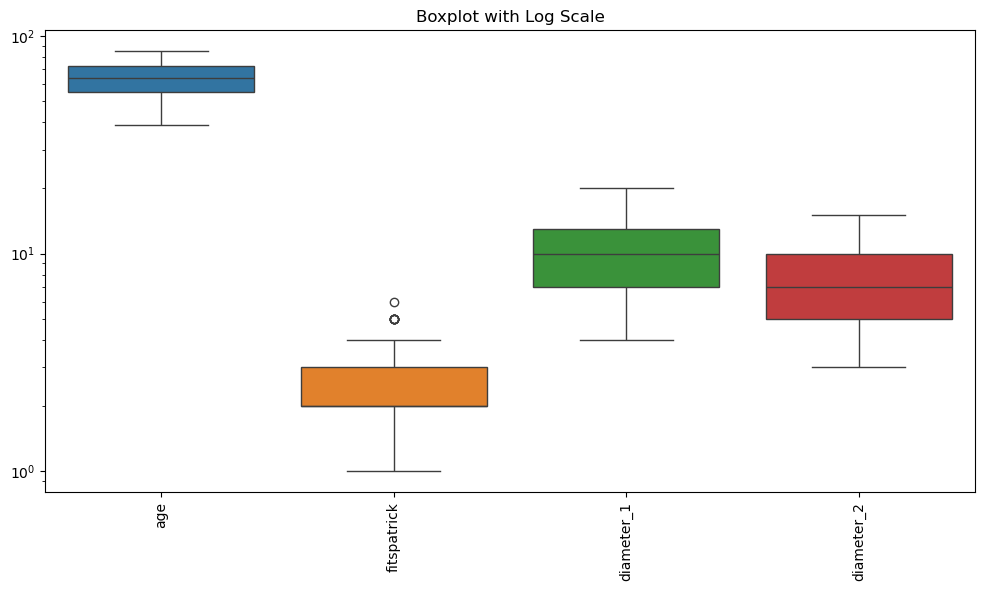

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.yscale("log") 
plt.xticks(rotation=90)
plt.title("Boxplot with Log Scale")
plt.show()

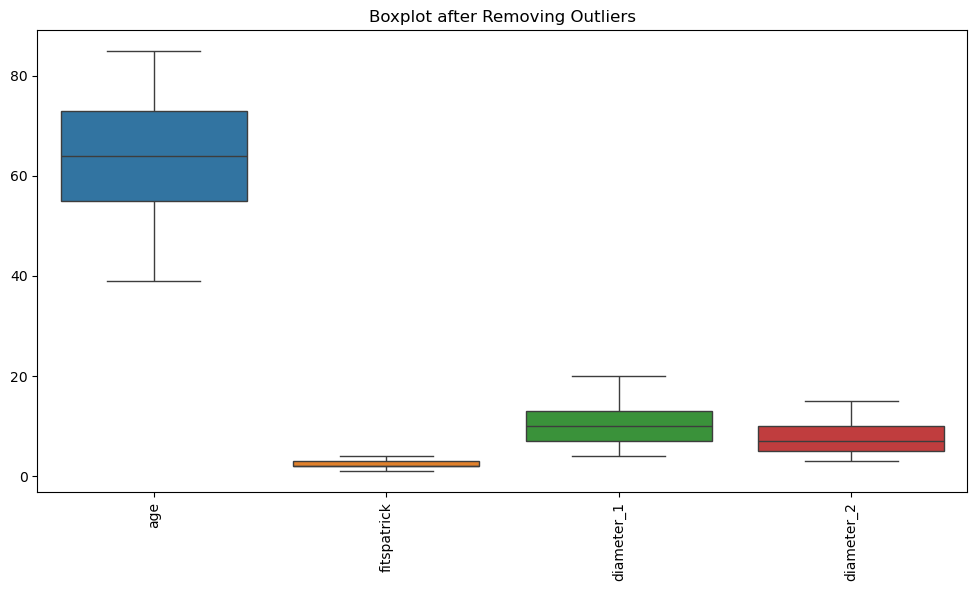

In [16]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
#الكود دا انا عملته عشان يشيل الداتا الي ملهاش لازمه الي ممكن تاثر علي الرسم
df_filtered = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot after Removing Outliers")
plt.show()

In [17]:
df.isnull().sum()

#كله صفر كدا مفيش اي missing data

patient_id             0
lesion_id              0
smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64

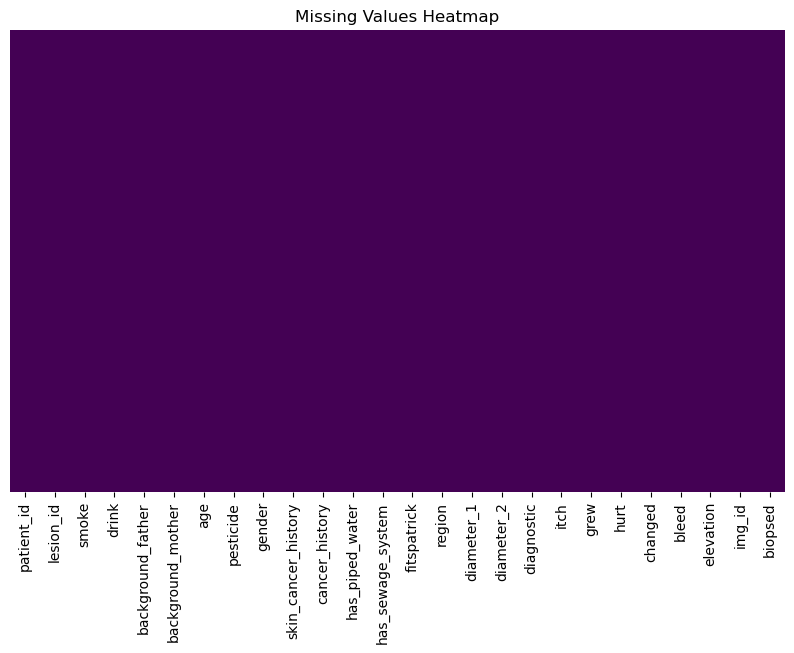

In [18]:
#عشان تعرف مكان missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

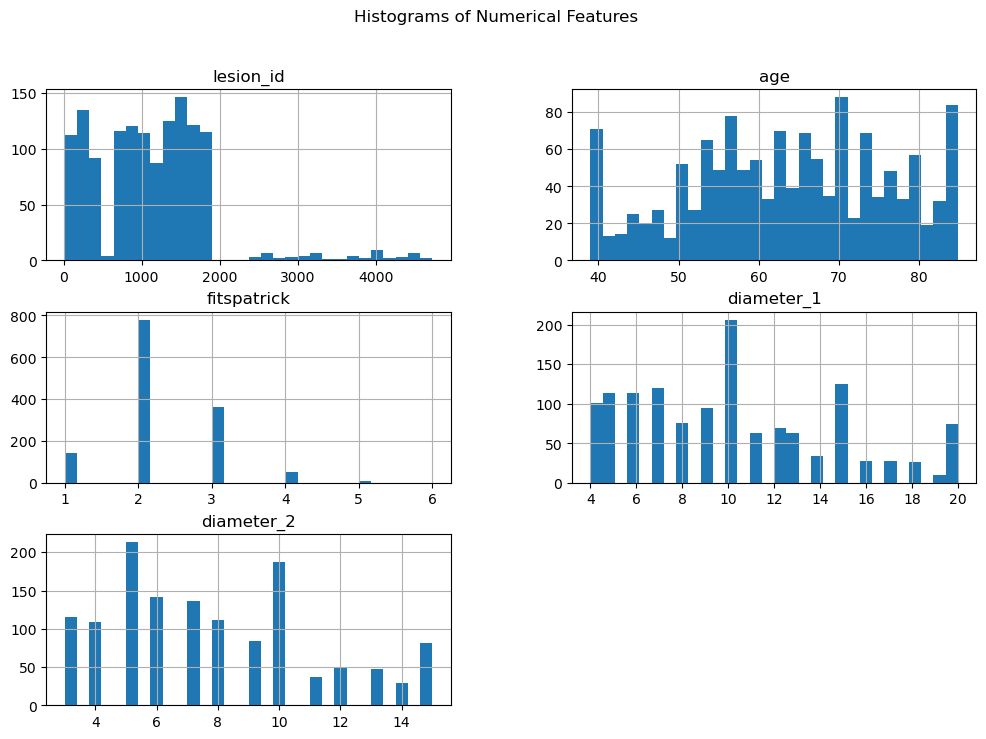

In [19]:

df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

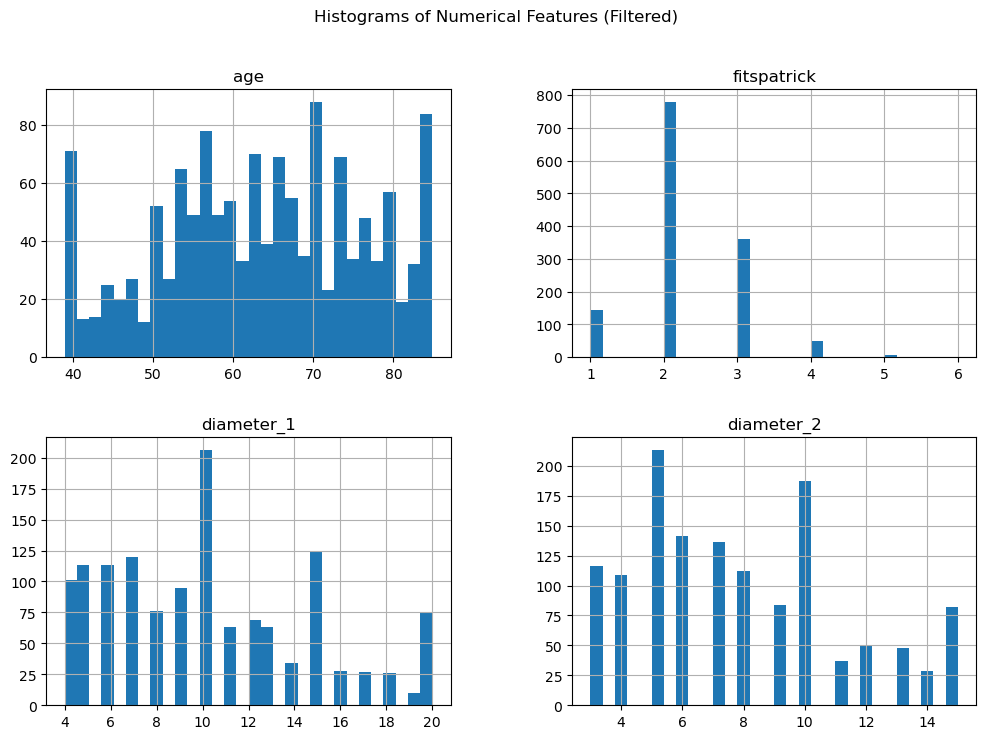

In [20]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col not in ['patient_id', 'lesion_id']]
df[numerical_columns].hist(figsize=(12,8), bins=30)
plt.suptitle("Histograms of Numerical Features (Filtered)")
plt.show()
#دا احسن شويه عشان شلت patient id & lesion id ملهومش لازمه غي الديجرام

In [21]:
df[numerical_columns].describe()

,age,fitspatrick,diameter_1,diameter_2
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,63.672470,2.254464,10.242560,7.764881
std,12.596994,0.721427,4.446164,3.387782
min,39.000000,1.000000,4.000000,3.000000
25%,55.000000,2.000000,7.000000,5.000000
50%,64.000000,2.000000,10.000000,7.000000
75%,73.000000,3.000000,13.000000,10.000000
max,84.850000,6.000000,20.000000,15.000000


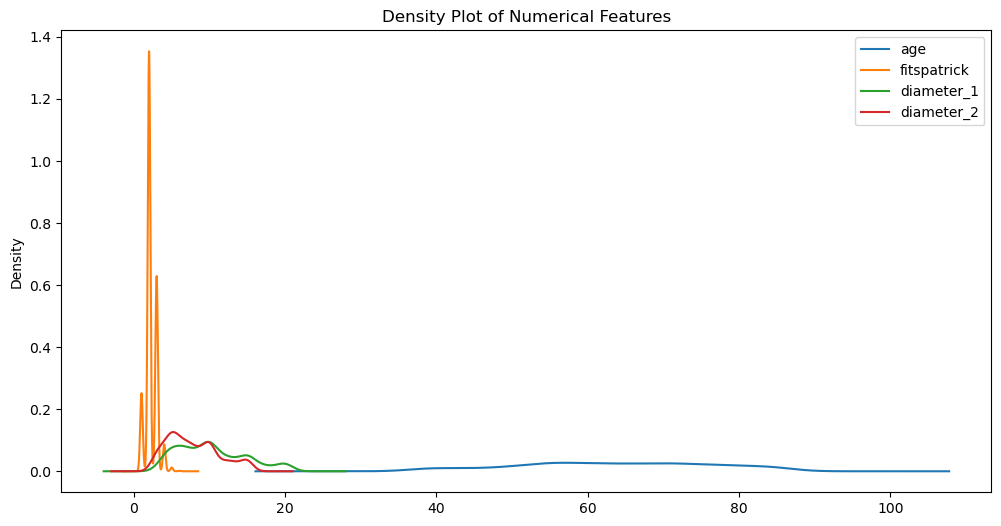

In [22]:
df[numerical_columns].plot(kind='kde', figsize=(12,6))
plt.title("Density Plot of Numerical Features")
plt.show()

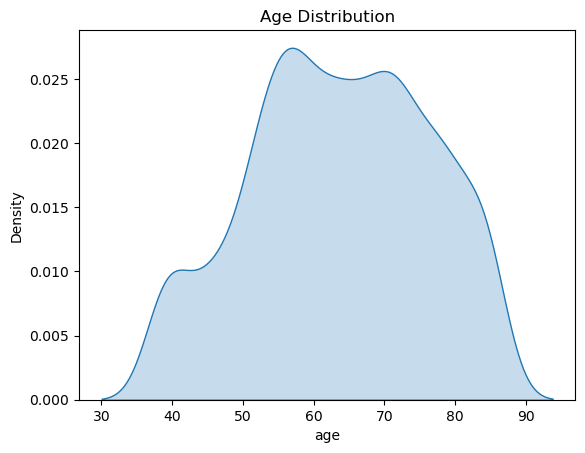

In [23]:
sns.kdeplot(df['age'], shade=True)
plt.title("Age Distribution")
plt.show()
#عشان نشوف شكل التوزيع

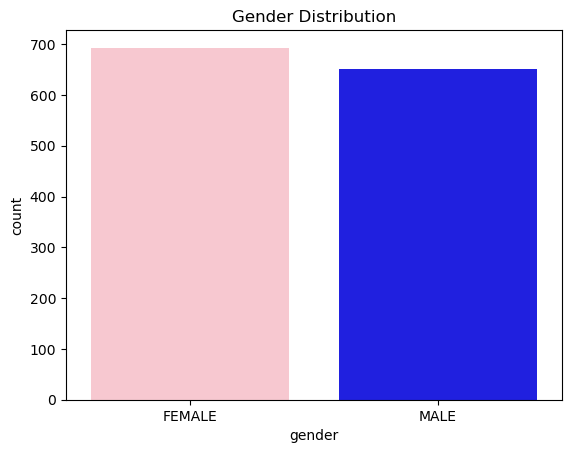

In [24]:

sns.countplot(x='gender', data=df, palette={'FEMALE': 'pink', 'MALE': 'blue'})
plt.title("Gender Distribution")
plt.show()

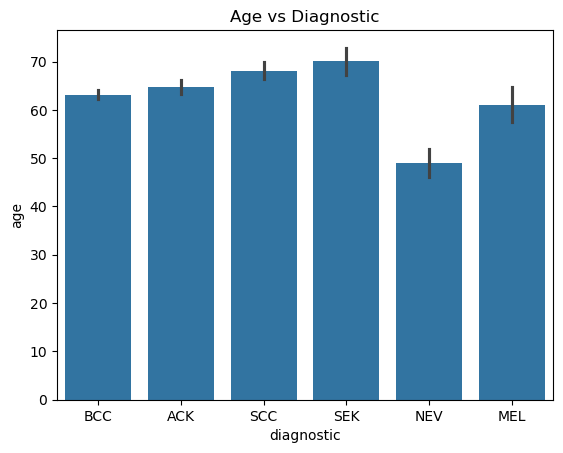

In [25]:
sns.barplot(x='diagnostic', y='age', data=df)
plt.title("Age vs Diagnostic")
plt.show()

# Preprocessing 

In [26]:
#check if the target variable (diagnostic) is imbalanced
df['diagnostic'].value_counts(normalize=True) * 100

diagnostic
BCC    57.886905
ACK    19.047619
SCC    13.020833
NEV     3.943452
MEL     3.199405
SEK     2.901786
Name: proportion, dtype: float64

In [27]:
#Encoder my target 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnostic'] = le.fit_transform(df['diagnostic'])

In [28]:
df = df.replace({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0, np.nan: 0})

In [29]:
target='diagnostic'
x=df.drop(target,axis=1)
y=df[target]